In [1]:
# read top states

import pickle
import numpy as np
import pandas as pd

with open('top_locations.dat', 'rb') as f:
# with open('top10reason.dat') as f:
    state_top = pickle.load(f)
f.close()


## Foursquare

In [2]:
# foursquare

file = 'auc_fsq.dat'

with open(file, 'rb') as f:
    aucs, confs, labels = pickle.load(f)
f.close()
    
aucs = np.array(aucs)

#remove 'Unknown'
aucs = aucs[:,:-1]

auc_mean_fsq = np.nanmean(aucs, axis=0)
# auc_ci_fsq = 2*np.nanstd(aucs,axis=0)/np.sqrt(aucs.shape[1])
auc_ci_lo_fsq = np.percentile(aucs, q=2.5, axis=0)
auc_ci_hi_fsq = np.percentile(aucs, q=97.5, axis=0)

auc_mean_fsq[[2,5,7]] = np.nan
auc_ci_lo_fsq[[2,5,7]] = np.nan
auc_ci_hi_fsq[[2,5,7]] = np.nan

conf_fsq = np.zeros([11,11])
for c in confs:
    conf_fsq += c[:-1,:-1] # without 'unknown'
conf_fsq[2,:] = np.nan
conf_fsq[5,:] = np.nan
conf_fsq[7,:] = np.nan
conf_fsq[:,2] = np.nan
conf_fsq[:,5] = np.nan
conf_fsq[:,7] = np.nan

## Sensor

In [6]:
# sensor only


file = 'auc_sensor_pro.dat'

with open(file,'rb') as f:
    aucs, confs, labels = pickle.load(f)
f.close()

aucs = np.array(aucs)
auc_mean_sensor = np.nanmean(aucs, axis=0)
# auc_ci_sensor = 2*np.nanstd(aucs,axis=0)/np.sqrt(aucs.shape[1])
auc_ci_lo_sensor = np.percentile(aucs, q=2.5, axis=0)
auc_ci_hi_sensor = np.percentile(aucs, q=97.5, axis=0)

conf_sensor = np.zeros([11,11])
for c in confs:
    conf_sensor += c


## Sensor + Foursquare

In [4]:
file = 'auc_all_pro.dat'

with open(file, 'rb') as f:
    aucs, confs, labels = pickle.load(f)
f.close()

aucs = np.array(aucs)
auc_mean_all = np.nanmean(aucs, axis=0)
# auc_ci_all = 2*np.nanstd(aucs,axis=0)/np.sqrt(aucs.shape[1])
auc_ci_lo_all = np.percentile(aucs, q=2.5, axis=0)
auc_ci_hi_all = np.percentile(aucs, q=97.5, axis=0)

conf_all = np.zeros([11,11])
for c in confs:
    conf_all += c


## Plot the results

[ 0.55243645  0.67589065  0.66913568  0.62177735  0.70789767  0.74194209
  0.72491717  0.68931631  0.68714527  0.90508341  0.78546419]


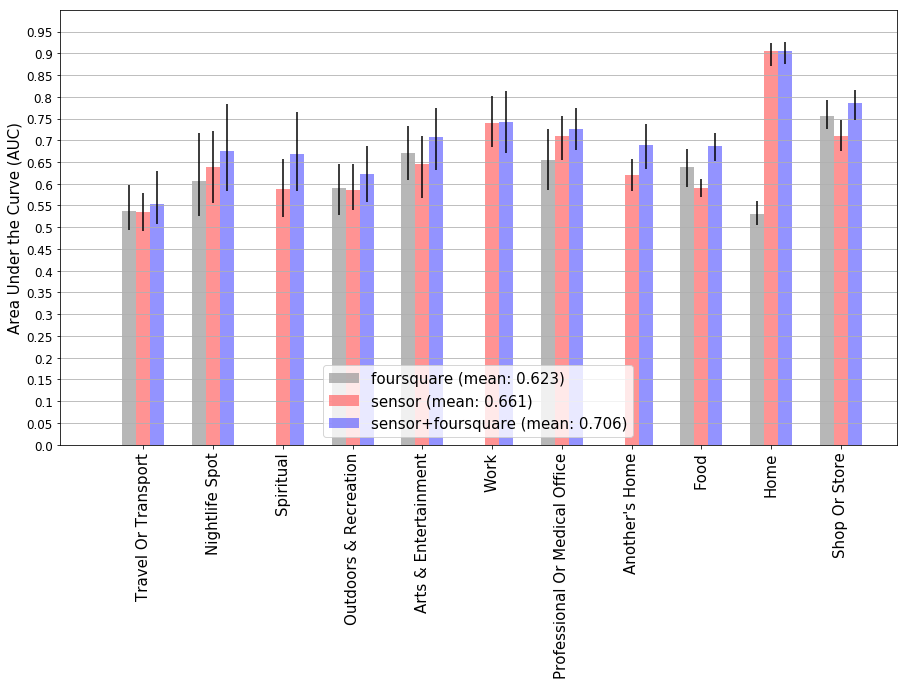

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
w = 1/5.0

plt.bar(np.arange(0,state_top.size,1), auc_mean_fsq, yerr=np.array([auc_mean_fsq-auc_ci_lo_fsq,auc_ci_hi_fsq-auc_mean_fsq]), width=w, align='center',\
         color=(.6,.6,.6), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(w,state_top.size+w,1), auc_mean_sensor, yerr=np.array([auc_mean_sensor-auc_ci_lo_sensor,auc_ci_hi_sensor-auc_mean_sensor]), width=w, align='center', \
         color=(1,.4,.4), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(2*w,state_top.size+2*w,1), auc_mean_all, yerr=np.array([auc_mean_all-auc_ci_lo_all,auc_ci_hi_all-auc_mean_all]), width=w, align='center', \
         color=(.4,.4,1), alpha=0.7, ecolor=(0,0,0))
plt.legend(['foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_fsq)),\
            'sensor (mean: {:.3f})'.format(np.nanmean(auc_mean_sensor)),\
            'sensor+foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_all))], loc='lower center', fontsize=15)
plt.ylabel('Area Under the Curve (AUC)',fontsize=15,color=(0,0,0))
# removing extra words
xlabel = state_top
for (i,xl) in enumerate(xlabel):
    label_broken = xl.split('(')
    xlabel[i] = label_broken[0]
    if len(label_broken)>1:
        xlabel[i] = xlabel[i][:-1]
plt.xticks(np.arange(w,state_top.size+w,1), xlabel, fontsize=15, color=(0,0,0), rotation=90, ha='center');
plt.yticks(np.arange(0,1,.05), np.arange(0,1,.05), fontsize=12, color=(0,0,0))
axes = plt.gca()
axes.set_xlim([-1, len(state_top)])
axes.set_ylim([0, 1])
axes.yaxis.grid()

print(auc_mean_all)
# print np.nanmean(auc_mean_sensor)
# print np.nanmean(auc_mean_all)


[ 0.84063505  0.89104877  0.87229057  0.8569108   0.9174349   0.8711243
  0.87697744  0.82756826  0.83323956  0.95917302  0.88969596]


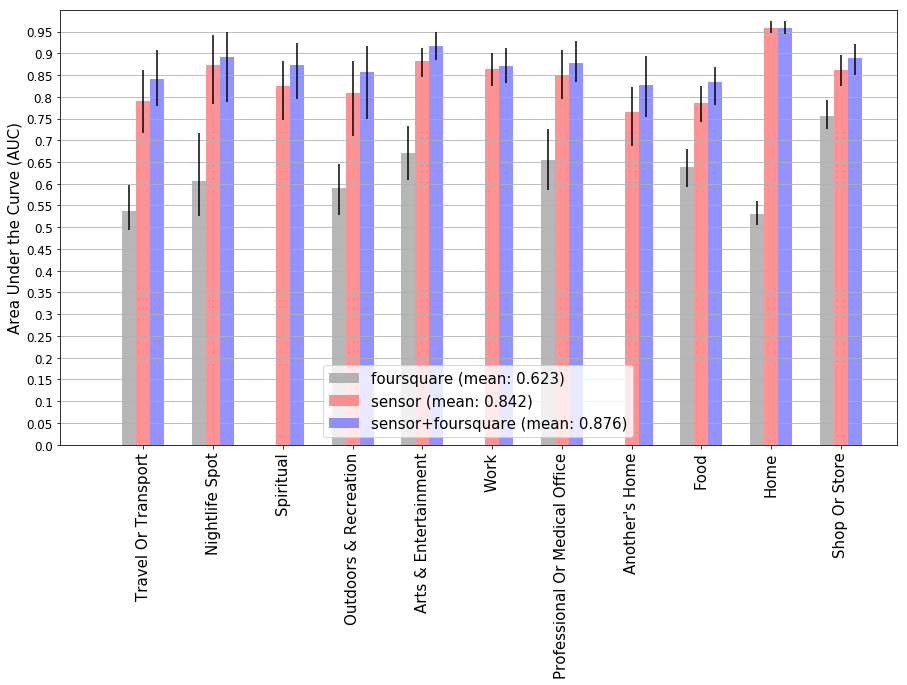

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
w = 1/5.0

plt.bar(np.arange(0,state_top.size,1), auc_mean_fsq, yerr=np.array([auc_mean_fsq-auc_ci_lo_fsq,auc_ci_hi_fsq-auc_mean_fsq]), width=w, align='center',\
         color=(.6,.6,.6), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(w,state_top.size+w,1), auc_mean_sensor, yerr=np.array([auc_mean_sensor-auc_ci_lo_sensor,auc_ci_hi_sensor-auc_mean_sensor]), width=w, align='center', \
         color=(1,.4,.4), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(2*w,state_top.size+2*w,1), auc_mean_all, yerr=np.array([auc_mean_all-auc_ci_lo_all,auc_ci_hi_all-auc_mean_all]), width=w, align='center', \
         color=(.4,.4,1), alpha=0.7, ecolor=(0,0,0))
plt.legend(['foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_fsq)),\
            'sensor (mean: {:.3f})'.format(np.nanmean(auc_mean_sensor)),\
            'sensor+foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_all))], loc='lower center', fontsize=15)
plt.ylabel('Area Under the Curve (AUC)',fontsize=15,color=(0,0,0))
# removing extra words
xlabel = state_top
for (i,xl) in enumerate(xlabel):
    label_broken = xl.split('(')
    xlabel[i] = label_broken[0]
    if len(label_broken)>1:
        xlabel[i] = xlabel[i][:-1]
plt.xticks(np.arange(w,state_top.size+w,1), xlabel, fontsize=15, color=(0,0,0), rotation=90, ha='center');
plt.yticks(np.arange(0,1,.05), np.arange(0,1,.05), fontsize=12, color=(0,0,0))
axes = plt.gca()
axes.set_xlim([-1, len(state_top)])
axes.set_ylim([0, 1])
axes.yaxis.grid()

print(auc_mean_all)
# print np.nanmean(auc_mean_sensor)
# print np.nanmean(auc_mean_all)


In [8]:
import pandas as pd
tab = pd.DataFrame(columns=['Semantic Location','Foursquare','Sensor','Sensor+Foursquare'])
for i in range(len(state_top)):
    tab.loc[i,'Semantic Location'] = state_top[i]
    tab.loc[i,'Foursquare'] = '{:.2f} ({:.2f}-{:.2f})'.format(auc_mean_fsq[i], auc_ci_lo_fsq[i], auc_ci_hi_fsq[i])
    tab.loc[i,'Sensor'] = '{:.2f} ({:.2f}-{:.2f})'.format(auc_mean_sensor[i], auc_ci_lo_sensor[i], auc_ci_hi_sensor[i])
    tab.loc[i,'Sensor+Foursquare'] = '{:.2f} ({:.2f}-{:.2f})'.format(auc_mean_all[i], auc_ci_lo_all[i], auc_ci_hi_all[i])
tab.loc[2,'Foursquare']='N/A'
tab.loc[5,'Foursquare']='N/A'
tab.loc[7,'Foursquare']='N/A'
tab.loc[11,'Semantic Location'] = 'MEAN'
tab.loc[11,'Foursquare'] = '{:.3f}'.format(np.nanmean(auc_mean_fsq))
tab.loc[11,'Sensor'] = '{:.3f}'.format(np.nanmean(auc_mean_sensor))
tab.loc[11,'Sensor+Foursquare'] = '{:.3f}'.format(np.nanmean(auc_mean_all))
tab

,Semantic Location,Foursquare,Sensor,Sensor+Foursquare
0,Travel Or Transport,0.54 (0.49-0.60),0.79 (0.72-0.86),0.84 (0.78-0.91)
1,Nightlife Spot,0.61 (0.53-0.72),0.87 (0.78-0.94),0.89 (0.79-0.95)
2,Spiritual,N/A,0.82 (0.75-0.88),0.87 (0.80-0.92)
3,Outdoors & Recreation,0.59 (0.53-0.64),0.81 (0.71-0.88),0.86 (0.75-0.92)
4,Arts & Entertainment,0.67 (0.61-0.73),0.88 (0.85-0.91),0.92 (0.88-0.95)
5,Work,N/A,0.86 (0.82-0.90),0.87 (0.83-0.91)
6,Professional Or Medical Office,0.65 (0.58-0.73),0.85 (0.80-0.91),0.88 (0.83-0.93)
7,Another's Home,N/A,0.77 (0.69-0.82),0.83 (0.75-0.89)
8,Food,0.64 (0.59-0.68),0.79 (0.74-0.83),0.83 (0.78-0.87)
9,Home,0.53 (0.51-0.56),0.96 (0.95-0.97),0.96 (0.95-0.97)


## Confusion Matrix

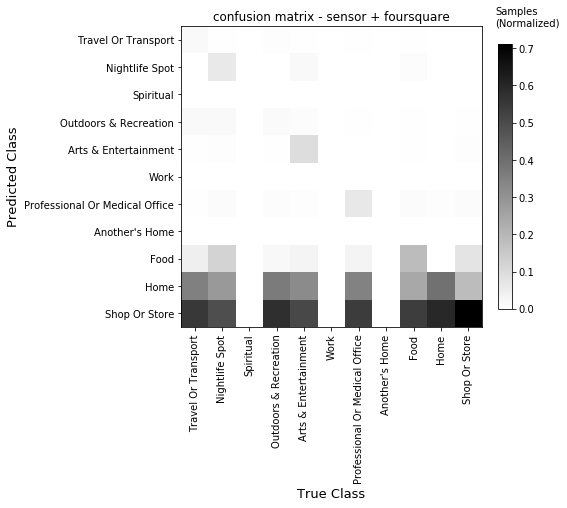

In [44]:
from soplata import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

cm_normalized = conf_fsq
for i in range(cm_normalized.shape[0]):
    cm_normalized[i,:] /= np.nansum(conf_fsq,axis=0)
plot_confusion_matrix(cm_normalized, state_top, cmap=plt.cm.gray_r, \
                      vmin=0, vmax=np.nanmax(cm_normalized), xsize=7, ysize=7)
plt.xlabel('True Class',fontsize=13)
plt.ylabel('Predicted Class',fontsize=13)
plt.colorbar(fraction=.04)
plt.text(11,-.5,'Samples\n(Normalized)')
plt.title('confusion matrix - sensor + foursquare')


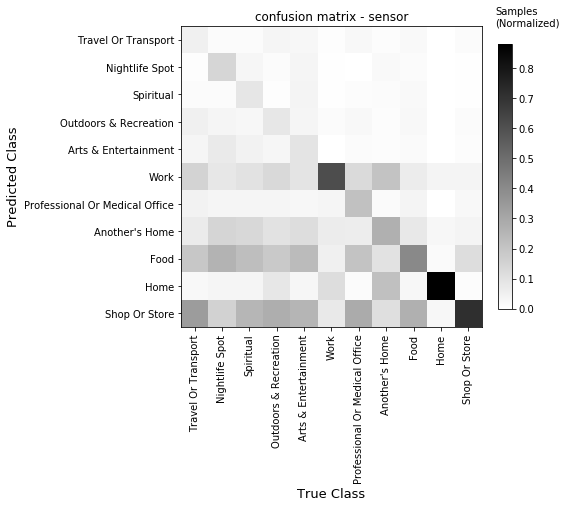

In [33]:
from soplata import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

cm_normalized = conf_sensor / conf_sensor.sum(axis=0)[np.newaxis,:]
plot_confusion_matrix(cm_normalized, state_top, cmap=plt.cm.gray_r, \
                      vmin=0, vmax=np.max(cm_normalized), xsize=7, ysize=7)
plt.xlabel('True Class',fontsize=13)
plt.ylabel('Predicted Class',fontsize=13)
plt.colorbar(fraction=.04)
plt.text(11,-.5,'Samples\n(Normalized)')
plt.title('confusion matrix - sensor')

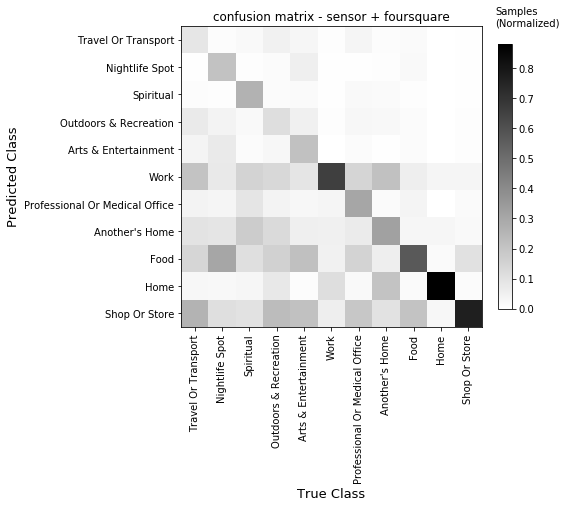

In [34]:
from soplata import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

cm_normalized = conf_all / conf_all.sum(axis=0)[np.newaxis,:]
plot_confusion_matrix(cm_normalized, state_top, cmap=plt.cm.gray_r, \
                      vmin=0, vmax=np.max(cm_normalized), xsize=7, ysize=7)
plt.xlabel('True Class',fontsize=13)
plt.ylabel('Predicted Class',fontsize=13)
plt.colorbar(fraction=.04)
plt.text(11,-.5,'Samples\n(Normalized)')
plt.title('confusion matrix - sensor + foursquare')

## Sensitivity, Specificity, and Accuracy

In [9]:
# tab = pd.DataFrame(columns=['FSQ SEN','FSQ SPEC','FSQ ACC','SEN SEN','SEN SPEC','SEN ACC','ALL SEN','ALL SPEC','ALL ACC'])
# tab = pd.DataFrame(columns=['FSQ SEN','FSQ SPEC','SEN SEN','SEN SPEC','ALL SEN','ALL SPEC'])
tab = pd.DataFrame(columns=['FSQ PRE','FSQ REC','SEN PRE','SEN REC','ALL PRE','ALL REC'])

fsq_mean = 0
for i in range(11):
    tab.loc[i,'FSQ REC'] = '{:.3f}'.format(conf_fsq[i,i]/np.nansum(conf_fsq[:,i]))
    tab.loc[i,'FSQ PRE'] = '{:.3f}'.format(conf_fsq[i,i]/np.nansum(conf_fsq[i,:]))
#     tab.loc[i,'FSQ SPEC'] = '{:.3f}'.format((np.nansum(conf_fsq[:i,:i])+np.nansum(conf_fsq[i+1:,i+1:])+np.nansum(conf_fsq[:i,i+1:])+np.nansum(conf_fsq[i+1:,:i]))/(np.nansum(conf_fsq[:,:i])+np.nansum(conf_fsq[:,i+1:])))
#     tab.loc[i,'FSQ ACC'] = '{:.3f}'.format((conf_fsq[i,i]+np.nansum(conf_fsq[:i,:i])+np.nansum(conf_fsq[i+1:,i+1:])+np.nansum(conf_fsq[:i,i+1:])+np.nansum(conf_fsq[i+1:,:i]))/np.nansum(conf_fsq))

for i in range(11):
    tab.loc[i,'SEN REC'] = '{:.3f}'.format(conf_sensor[i,i]/np.sum(conf_sensor[:,i]))
    tab.loc[i,'SEN PRE'] = '{:.3f}'.format(conf_sensor[i,i]/np.sum(conf_sensor[i,:]))
#     tab.loc[i,'SEN SPEC'] = '{:.3f}'.format((np.sum(conf_sensor[:i,:i])+np.sum(conf_sensor[i+1:,i+1:])+np.sum(conf_sensor[:i,i+1:])+np.sum(conf_sensor[i+1:,:i]))/(np.sum(conf_sensor[:,:i])+np.sum(conf_sensor[:,i+1:])))
#     tab.loc[i,'SEN ACC'] = '{:.3f}'.format((conf_sensor[i,i]+np.sum(conf_sensor[:i,:i])+np.sum(conf_sensor[i+1:,i+1:])+np.sum(conf_sensor[:i,i+1:])+np.sum(conf_sensor[i+1:,:i]))/np.sum(conf_sensor))

for i in range(11):
    tab.loc[i,'ALL REC'] = '{:.3f}'.format(conf_all[i,i]/np.sum(conf_all[:,i]))
    tab.loc[i,'ALL PRE'] = '{:.3f}'.format(conf_all[i,i]/np.sum(conf_all[i,:]))
#     tab.loc[i,'ALL SPEC'] = '{:.3f}'.format((np.sum(conf_all[:i,:i])+np.sum(conf_all[i+1:,i+1:])+np.sum(conf_all[:i,i+1:])+np.sum(conf_all[i+1:,:i]))/(np.sum(conf_all[:,:i])+np.sum(conf_all[:,i+1:])))
#     tab.loc[i,'ALL ACC'] = '{:.3f}'.format((conf_all[i,i]+np.sum(conf_all[:i,:i])+np.sum(conf_all[i+1:,i+1:])+np.sum(conf_all[:i,i+1:])+np.sum(conf_all[i+1:,:i]))/np.sum(conf_all))

# tab.loc[11,'FSQ SEN'] = np.nanmean(tab['FSQ SEN'].astype(float))
# tab.loc[11,'FSQ SPEC'] = np.nanmean(tab['FSQ SPEC'].astype(float))
# tab.loc[11,'FSQ ACC'] = np.nanmean(tab['FSQ ACC'].astype(float))
# tab.loc[11,'SEN SEN'] = np.nanmean(tab['SEN SEN'].astype(float))
# tab.loc[11,'SEN SPEC'] = np.nanmean(tab['SEN SPEC'].astype(float))
# tab.loc[11,'SEN ACC'] = np.nanmean(tab['SEN ACC'].astype(float))
# tab.loc[11,'ALL SEN'] = np.nanmean(tab['ALL SEN'].astype(float))
# tab.loc[11,'ALL SPEC'] = np.nanmean(tab['ALL SPEC'].astype(float))
# tab.loc[11,'ALL ACC'] = np.nanmean(tab['ALL ACC'].astype(float))
print('FSQ ACC: {:.3f}'.format(np.nansum([conf_fsq[i,i] for i in range(conf_fsq.shape[0])])/np.nansum(conf_fsq)))
print('SEN ACC: {:.3f}'.format(np.nansum([conf_sensor[i,i] for i in range(conf_sensor.shape[0])])/np.nansum(conf_sensor)))
print('ALL ACC: {:.3f}'.format(np.nansum([conf_all[i,i] for i in range(conf_all.shape[0])])/np.nansum(conf_all)))

tab

FSQ ACC: 0.344
SEN ACC: 0.581
ALL ACC: 0.647


,FSQ PRE,FSQ REC,SEN PRE,SEN REC,ALL PRE,ALL REC
0,0.146,0.047,0.088,0.053,0.112,0.087
1,0.293,0.213,0.289,0.143,0.359,0.212
2,nan,nan,0.199,0.088,0.349,0.267
3,0.592,0.036,0.210,0.084,0.275,0.115
4,0.501,0.270,0.337,0.094,0.441,0.213
5,nan,nan,0.527,0.614,0.519,0.661
6,0.535,0.177,0.475,0.215,0.483,0.308
7,nan,nan,0.303,0.273,0.450,0.324
8,0.458,0.464,0.223,0.406,0.415,0.566
9,0.084,0.910,0.885,0.879,0.886,0.879
